In [2]:
download_path = '../../../project_data/downloads/'
# !gdown 1SoIxGc-T8VOi3pOhMCO-pM6Py5BLt3G_ -O download_path # model: 500_epochs.h5
# !gdown 1Rjl3i86XTnDEKGUYT3Pjg8JfdBIdHt6y -O download_path # training set: train.npz
!gdown 1e65FERfU4feXZ8FjB9q5JEhzPazjQXcn -O download_path # test set: test.npz
# !gdown 1f_Prjy7IChPW7FdZvWs0dsWh0DGBr43X -O download_path # validation set: validation.npz

Downloading...
From: https://drive.google.com/uc?id=1e65FERfU4feXZ8FjB9q5JEhzPazjQXcn
To: /Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/facial-expression-recognition/notebooks/ivan/download_path
100%|██████████████████████████████████████| 16.6M/16.6M [00:03<00:00, 4.41MB/s]


In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [71]:
[i for i in emotions.values()]

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [5]:
test = np.load(download_path+'test.npz')
test.files

['test_images', 'test_labels']

In [6]:
test_images = test['test_images']
test_labels = test['test_labels']

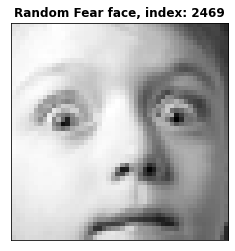

In [387]:
f = np.random.randint(1,len(test_images))
img = test_images[f]

plt.imshow(img, cmap='gray')
plt.title(f'Random {emotions[test_labels[f]]} face, index: {f}', fontweight = 'bold')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [388]:
keep.append(f)

In [180]:
# keep = []

In [179]:
keep

[2027, 2904, 765]

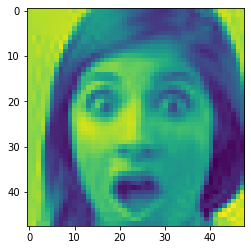

In [40]:
plt.imshow(test_images[1750])
plt.show()

In [97]:
emotions

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [95]:
path = '../../../project_data/fer2013/icml_face_data.csv'
df = pd.read_csv(path)

# creating the test dataframe, dropping the usage column and reseting the index
test = df[df[' Usage']=='PrivateTest'].copy()
test.drop([' Usage'], axis = 1, inplace = True)
test.reset_index(inplace = True, drop = True)

In [134]:
def transform(data, index):
    '''
    Function for extracting pixel values from the pixel column and scaling them between 0 and 1
    
    get values from the column|
    split on the whitespace
    convert to float16 datatype
    save as as numpy array
    scale the values between 0 and 1
    '''
    
    img_array = np.array(data.iloc[index,1].split(' '), dtype = 'float16')
    img_array = img_array / 255.0
    img = np.reshape(img_array,(48,48,1))
    
    return img

In [135]:
im1324=transform(test,2403)

(48, 48, 1)

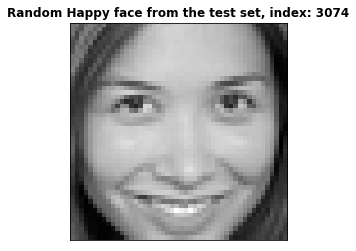

In [185]:
plt.imshow(transform(test,f), cmap='gray')
plt.title(f'Random {emotions[test_labels[f]]} face from the test set, index: {f}', fontweight = 'bold')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

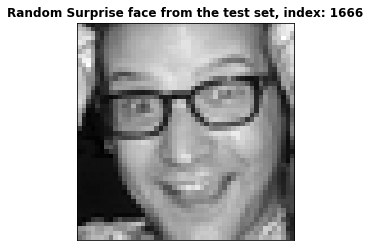

In [140]:
plt.imshow(transform(test,f), cmap='gray')
plt.title(f'Random {emotions[test_labels[f]]} face from the test set, index: {f}', fontweight = 'bold')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [211]:
keep

[2027, 2904, 765, 3074, 1666]

In [465]:
imgs= [test_images[i] for i in keep]
len(imgs)

7

ValueError: num must be 1 <= num <= 5, not 6

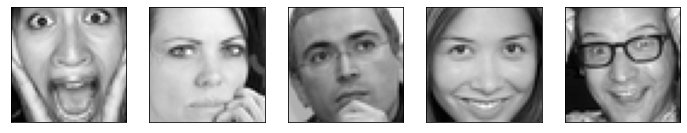

In [462]:
plt.figure(figsize=(12,12))
for _ in range(5):
    for ind, img in enumerate(imgs):
        plt.subplot(1,5,ind+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap='gray')
#         plt.xlabel(emotions[lbls[ind]], size = 17)
    plt.show()

In [269]:
# train_datagen.next()

In [279]:
[i.shape for i in [test_images[i] for i in keep]]

[(48, 48, 1), (48, 48, 1), (48, 48, 1), (48, 48, 1), (48, 48, 1)]

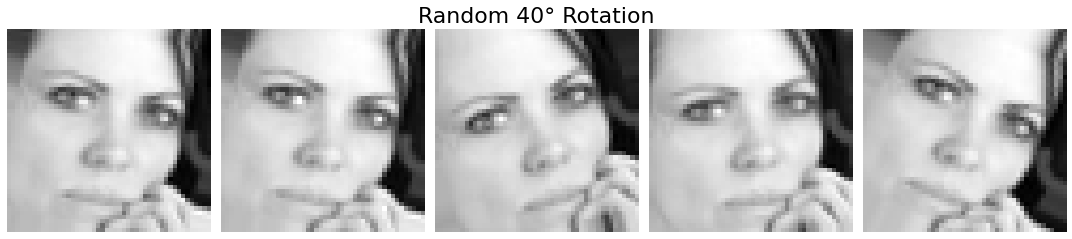

In [439]:
datagen = ImageDataGenerator(rotation_range=40,fill_mode='nearest')

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('Random 40\N{DEGREE SIGN} Rotation', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

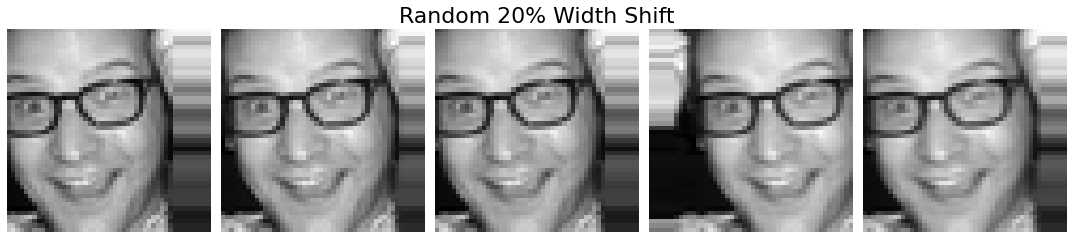

In [442]:
datagen = ImageDataGenerator(width_shift_range=0.2,fill_mode='nearest')

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('Random 20% Width Shift', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

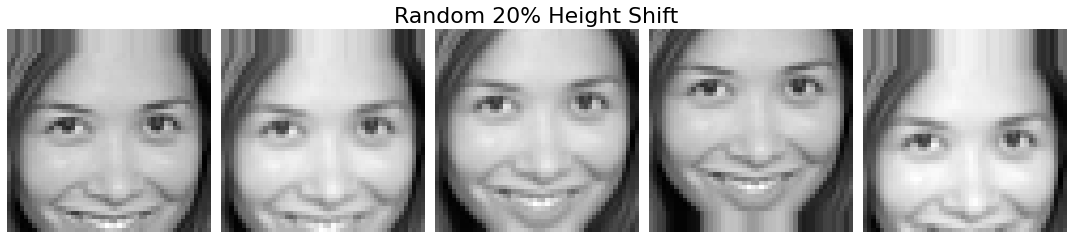

In [444]:
datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode='nearest')

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('Random 20% Height Shift', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

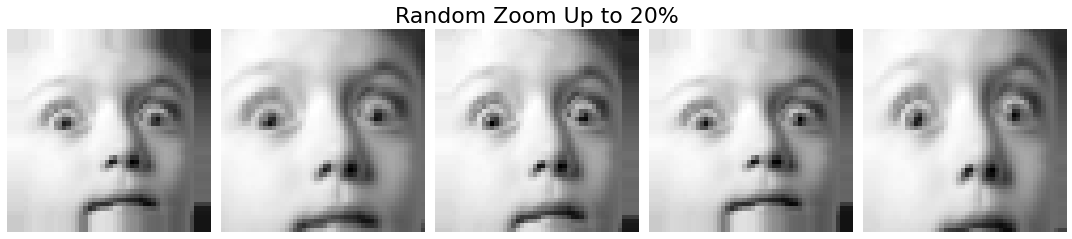

In [445]:
datagen = ImageDataGenerator(zoom_range=0.2,fill_mode='nearest')

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('Random Zoom Up to 20%', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

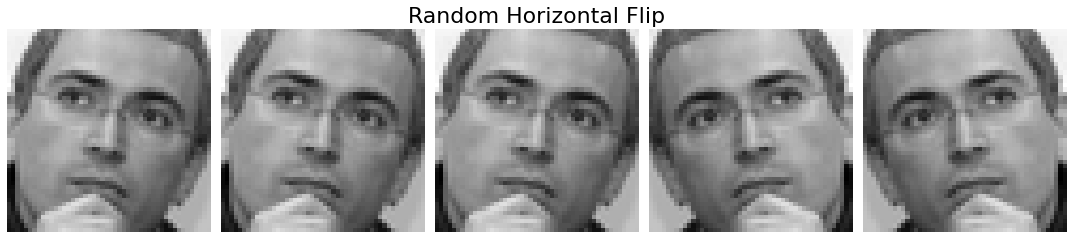

In [446]:
datagen = ImageDataGenerator(horizontal_flip=True,fill_mode='nearest')

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('Random Horizontal Flip', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

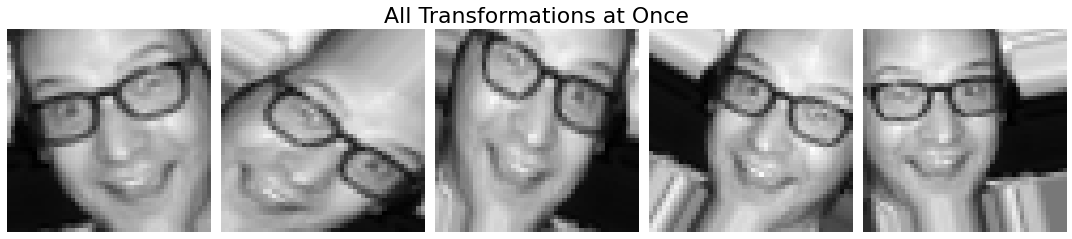

In [461]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
)

f = np.random.randint(1,len(keep))
img = test_images[keep[f]]
arr = np.array([img])

# iterator
augmentation_iterator = datagen.flow(arr, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
fig.suptitle('All Transformations at Once', y=0.6, size=22)
for i in range(5):

    image = next(augmentation_iterator)[0]
    # plot image
    ax[i].imshow(image,cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
)